Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Loading the data and dropping na values

In [2]:
eth_data = pd.read_csv('https://raw.githubusercontent.com/RyanSaul85/datasets/master/CBETHUSD%20-%20CBETHUSD.csv?token=GHSAT0AAAAAABV3LLUEG2VPJN2M4RV5EG22YXBIIVQ')

# Remove `NA` values
eth_data.dropna(inplace=True)

eth_data.head()

,DATE,CBETHUSD
0,2017-07-25,203.78
1,2017-07-26,203.23
2,2017-07-27,202.94
3,2017-07-28,190.72
4,2017-07-29,205.9


Creating a price column with numeric data

In [3]:
eth_data['price'] = pd.to_numeric(eth_data['CBETHUSD'], errors='coerce')

eth_data.dropna(inplace=True)

eth_data.head()

,DATE,CBETHUSD,price
0,2017-07-25,203.78,203.78
1,2017-07-26,203.23,203.23
2,2017-07-27,202.94,202.94
3,2017-07-28,190.72,190.72
4,2017-07-29,205.9,205.90


Making sure there are no na or infinite values in the data

In [4]:
print(np.isnan(eth_data.price).any())

print(np.isinf(eth_data.price).any())

False
False


Plotting the ETH Time Series data

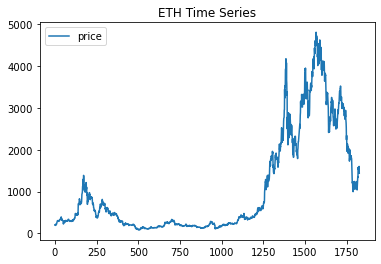

In [5]:
eth_data.plot()
plt.title('ETH Time Series')
plt.show()

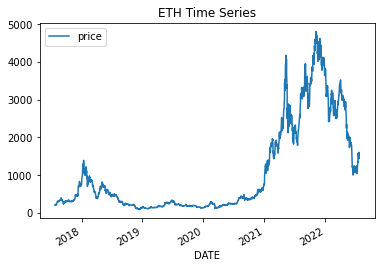

In [6]:
eth_data.index = pd.to_datetime(eth_data['DATE'])
eth_data.plot()
plt.title('ETH Time Series')
plt.show()

Plotting the ETH Diff data

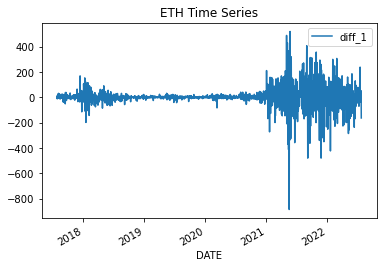

In [7]:
eth_data['diff_1'] = eth_data.price - eth_data.price.shift()
eth_data.plot(y='diff_1')
plt.title('ETH Time Series')
plt.show()

PACF (Partial AutoCorrelation Function) Plots

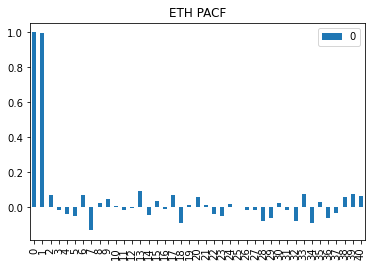

In [8]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(eth_data.price))
x_acf.plot(kind='bar')
plt.title("ETH PACF");

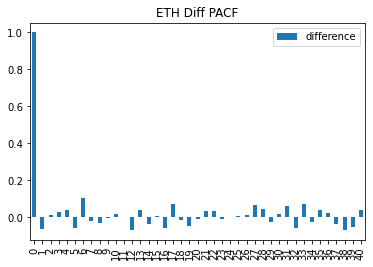

In [9]:
x_acf = pd.DataFrame(pacf(eth_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("ETH Diff PACF")
plt.legend(['difference']);

Interpreting the PACF

- significant correlation at lag 0 and 1 for ETH meaning autoregressive term of order 2
- significant correlation at lag 0 for ETH Diff meaning autoregressive term of order 1

Showing the ETH Time Series data and the ETH Diff data together

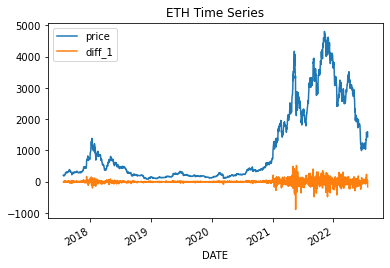

In [10]:
eth_data.index = pd.to_datetime(eth_data['DATE'])
eth_data.plot()
plt.title('ETH Time Series')
plt.show()

In [11]:
import warnings
warnings.filterwarnings('ignore')

Doing a variety of different values for (AR,I,MA) to determine the best model for the data

In [12]:
from statsmodels.tsa.arima_model import ARIMA
model_510 = ARIMA(eth_data.price, order=(5,1,0))
model_510_fit = model_510.fit()
print(model_510_fit.summary())
print('510 Residuals Description')
print(model_510_fit.resid.describe());

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 1825
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10535.007
Method:                       css-mle   S.D. of innovations             77.763
Date:                Wed, 27 Jul 2022   AIC                          21084.015
Time:                        10:42:09   BIC                          21122.580
Sample:                             1   HQIC                         21098.241
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6788      1.742      0.390      0.697      -2.735       4.092
ar.L1.D.price    -0.0648      0.023     -2.769      0.006      -0.111      -0.019
ar.L2.D.price     0.0142      0.023     

In [13]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(eth_data.price, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('111 Residuals Description')
print(model_111_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 1825
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10540.328
Method:                       css-mle   S.D. of innovations             77.990
Date:                Wed, 27 Jul 2022   AIC                          21088.657
Time:                        10:42:10   BIC                          21110.694
Sample:                             1   HQIC                         21096.786
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6810      1.722      0.395      0.693      -2.695       4.057
ar.L1.D.price    -0.1686      0.295     -0.571      0.568      -0.747       0.410
ma.L1.D.price     0.1024      0.298     

In [14]:
from statsmodels.tsa.arima_model import ARIMA
model_511 = ARIMA(eth_data.price, order=(5,1,1))
model_511_fit = model_511.fit()
print(model_511_fit.summary())
print('511 Residuals Description')
print(model_511_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 1825
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -10529.370
Method:                       css-mle   S.D. of innovations             77.522
Date:                Wed, 27 Jul 2022   AIC                          21074.739
Time:                        10:42:11   BIC                          21118.814
Sample:                             1   HQIC                         21090.998
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6787      1.752      0.387      0.698      -2.754       4.112
ar.L1.D.price    -0.5999      0.105     -5.713      0.000      -0.806      -0.394
ar.L2.D.price    -0.0210      0.028     

In [15]:
from statsmodels.tsa.arima_model import ARIMA
model_512 = ARIMA(eth_data.price, order=(5,1,2))
model_512_fit = model_512.fit()
print(model_512_fit.summary())
print('512 Residuals Description')
print(model_512_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 1825
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -10527.192
Method:                       css-mle   S.D. of innovations             77.429
Date:                Wed, 27 Jul 2022   AIC                          21072.385
Time:                        10:42:15   BIC                          21121.969
Sample:                             1   HQIC                         21090.675
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6782      1.767      0.384      0.701      -2.785       4.141
ar.L1.D.price    -1.0065      0.285     -3.538      0.000      -1.564      -0.449
ar.L2.D.price    -0.4048      0.181     

In [16]:
from statsmodels.tsa.arima_model import ARIMA
model_513 = ARIMA(eth_data.price, order=(5,1,3))
model_513_fit = model_513.fit()
print(model_513_fit.summary())
print('Residuals Description')
print(model_513_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 1825
Model:                 ARIMA(5, 1, 3)   Log Likelihood              -10518.507
Method:                       css-mle   S.D. of innovations             77.056
Date:                Wed, 27 Jul 2022   AIC                          21057.015
Time:                        10:42:22   BIC                          21112.108
Sample:                             1   HQIC                         21077.338
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6799      1.810      0.376      0.707      -2.868       4.228
ar.L1.D.price    -2.0623      0.239     -8.622      0.000      -2.531      -1.593
ar.L2.D.price    -1.3813      0.452     

In [17]:
from statsmodels.tsa.arima_model import ARIMA
model_100 = ARIMA(eth_data.price, order=(1,0,0))
model_100_fit = model_100.fit()
print(model_100_fit.summary())
print('100 Residuals Description')
print(model_100_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 1826
Model:                     ARMA(1, 0)   Log Likelihood              -10551.685
Method:                       css-mle   S.D. of innovations             78.115
Date:                Wed, 27 Jul 2022   AIC                          21109.370
Time:                        10:42:24   BIC                          21125.899
Sample:                             0   HQIC                         21115.467
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         981.4961    636.002      1.543      0.123    -265.046    2228.038
ar.L1.price     0.9976      0.001    726.674      0.000       0.995       1.000
                                    Roots       

In [18]:
from statsmodels.tsa.arima_model import ARIMA
model_101 = ARIMA(eth_data.price, order=(1,0,1))
model_101_fit = model_101.fit()
print(model_101_fit.summary())
print('101 Residuals Description')
print(model_101_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 1826
Model:                     ARMA(1, 1)   Log Likelihood              -10547.911
Method:                       css-mle   S.D. of innovations             77.953
Date:                Wed, 27 Jul 2022   AIC                          21103.822
Time:                        10:42:24   BIC                          21125.861
Sample:                             0   HQIC                         21111.951
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1055.0566    658.717      1.602      0.109    -236.005    2346.118
ar.L1.price     0.9979      0.001    780.375      0.000       0.995       1.000
ma.L1.price    -0.0634      0.023     -2.764    

In [19]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(eth_data.price, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('111 Residuals Description')
print(model_111_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 1825
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10540.328
Method:                       css-mle   S.D. of innovations             77.990
Date:                Wed, 27 Jul 2022   AIC                          21088.657
Time:                        10:42:25   BIC                          21110.694
Sample:                             1   HQIC                         21096.786
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6810      1.722      0.395      0.693      -2.695       4.057
ar.L1.D.price    -0.1686      0.295     -0.571      0.568      -0.747       0.410
ma.L1.D.price     0.1024      0.298     

In [20]:
from statsmodels.tsa.arima_model import ARIMA
model_300 = ARIMA(eth_data.price, order=(3,0,0))
model_300_fit = model_300.fit()
print(model_300_fit.summary())
print('300 Residuals Description')
print(model_300_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 1826
Model:                     ARMA(3, 0)   Log Likelihood              -10547.653
Method:                       css-mle   S.D. of innovations             77.942
Date:                Wed, 27 Jul 2022   AIC                          21105.306
Time:                        10:42:25   BIC                          21132.856
Sample:                             0   HQIC                         21115.469
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1055.0570    654.259      1.613      0.107    -227.267    2337.381
ar.L1.price     0.9332      0.023     39.863      0.000       0.887       0.979
ar.L2.price     0.0767      0.032      2.398    

In [21]:
from statsmodels.tsa.arima_model import ARIMA
model_301 = ARIMA(eth_data.price, order=(3,0,1))
model_301_fit = model_301.fit()
print(model_301_fit.summary())
print('301 Residuals Description')
print(model_301_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 1826
Model:                     ARMA(3, 1)   Log Likelihood              -10546.086
Method:                       css-mle   S.D. of innovations             77.875
Date:                Wed, 27 Jul 2022   AIC                          21104.172
Time:                        10:42:26   BIC                          21137.231
Sample:                             0   HQIC                         21116.367
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1055.0682    653.402      1.615      0.106    -225.577    2335.713
ar.L1.price     0.1476      0.087      1.688      0.091      -0.024       0.319
ar.L2.price     0.8235      0.075     10.952    

In [22]:
from statsmodels.tsa.arima_model import ARIMA
model_311 = ARIMA(eth_data.price, order=(3,1,1))
model_311_fit = model_311.fit()
print(model_311_fit.summary())
print('311 Residuals Description')
print(model_311_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 1825
Model:                 ARIMA(3, 1, 1)   Log Likelihood              -10539.029
Method:                       css-mle   S.D. of innovations             77.935
Date:                Wed, 27 Jul 2022   AIC                          21090.058
Time:                        10:42:27   BIC                          21123.114
Sample:                             1   HQIC                         21102.251
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6767      1.855      0.365      0.715      -2.959       4.312
ar.L1.D.price     0.4872      0.335      1.456      0.145      -0.169       1.143
ar.L2.D.price     0.0495      0.034     

In [23]:
from statsmodels.tsa.arima_model import ARIMA
model_001 = ARIMA(eth_data.price, order=(0,0,1))
model_001_fit = model_001.fit()
print(model_001_fit.summary())
print('001 Residuals Description')
print(model_001_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 1826
Model:                     ARMA(0, 1)   Log Likelihood              -14383.461
Method:                       css-mle   S.D. of innovations            637.418
Date:                Wed, 27 Jul 2022   AIC                          28772.923
Time:                        10:42:28   BIC                          28789.452
Sample:                             0   HQIC                         28779.020
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1054.8554     29.160     36.175      0.000     997.703    1112.008
ma.L1.price     0.9554      0.005    194.758      0.000       0.946       0.965
                                    Roots       

In [24]:
from statsmodels.tsa.arima_model import ARIMA
model_201 = ARIMA(eth_data.price, order=(2,0,1))
model_201_fit = model_201.fit()
print(model_201_fit.summary())
print('201 Residuals Description')
print(model_201_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 1826
Model:                     ARMA(2, 1)   Log Likelihood              -10547.711
Method:                       css-mle   S.D. of innovations             77.945
Date:                Wed, 27 Jul 2022   AIC                          21105.421
Time:                        10:42:29   BIC                          21132.970
Sample:                             0   HQIC                         21115.583
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1055.0559    656.139      1.608      0.108    -230.954    2341.066
ar.L1.price     0.8202      0.295      2.777      0.005       0.241       1.399
ar.L2.price     0.1773      0.295      0.602    

The AR is the past values, I is the level of differencing, and MA is adjusting to past errors.

The ARIMA (AR,I,MA) (1,0,1) model is the most accurate since the LR is 0.9979 meaning the value is not changing very much from a day-to-day standpoint and the MA is 6.34% meaning the eror will be reduced by that value each day.

                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1055.0566    658.717      1.602      0.109    -236.005    2346.118
ar.L1.price     0.9979      0.001    780.375      0.000       0.995       1.000
ma.L1.price    -0.0634      0.023     -2.764      0.006      -0.108      -0.018